In [105]:
#Notebook to visualize final datasets
%matplotlib notebook
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import pandas_profiling  #!pip install pandas-profiling
from scipy.stats import linregress
from sklearn import datasets

In [106]:
# Reading final datasets

#Leagues datasets
all_xG = pd.read_csv('cleandata/all_xG.csv')
nodup_xG = pd.read_csv('cleandata/nodup_xG.csv')

#FIFA dataset
attackers = pd.read_csv('cleandata/attackers.csv')

In [107]:
# adding last name column to all_xG and nodup_xG datasets
#I used the same Patrick's method in the notebook "Attacker_Data_Cleaned"

lname_all_xG = []
for name in all_xG['player_name']:
    lname_all_xG.append(name.split(" ")[-1])
    
all_xG.insert(loc=3, column='Last_Name', value=lname_all_xG)


lname_nodup_xG = []
for name in nodup_xG['player_name']:
    lname_nodup_xG.append(name.split(" ")[-1])
    
nodup_xG.insert(loc=3, column='Last_Name', value=lname_nodup_xG)


In [108]:
#renaming column for further merging
attackers = attackers.rename(columns = {"Club_2017": "team_title_17"}) 

In [109]:
#merge all data by last name
data_all = pd.merge(all_xG, attackers, on=['Last_Name','team_title_17'], how ='outer')
data_nodup = pd.merge(nodup_xG, attackers, on=['Last_Name','team_title_17'], how ='outer')

In [110]:
#data_nodup.profile_report(style={'full_width':True})

In [125]:
data_nodup = data_nodup.dropna()
data_nodup['Short_Pass_2017'][0:100]

1       76.0
3       79.0
5       81.0
7       84.0
8       70.0
        ... 
1716    81.0
1751    48.0
1785    58.0
1834    52.0
1943    76.0
Name: Short_Pass_2017, Length: 81, dtype: float64

In [112]:
data_nodup.columns

Index(['Unnamed: 0', 'id', 'player_name', 'Last_Name', 'games_18', 'time_18',
       'goals_18', 'xG_18', 'assists_18', 'xA_18', 'shots_18', 'key_passes_18',
       'team_title_18', 'npg_18', 'npxG_18', 'league_18', 'games_17',
       'time_17', 'goals_17', 'xG_17', 'assists_17', 'xA_17', 'shots_17',
       'key_passes_17', 'team_title_17', 'npg_17', 'npxG_17', 'league_17',
       'games_16', 'time_16', 'goals_16', 'xG_16', 'assists_16', 'xA_16',
       'shots_16', 'key_passes_16', 'team_title_16', 'npg_16', 'npxG_16',
       'league_16', 'Name_x', 'Birth_Date', 'Rating_2017', 'Positioning_2017',
       'Finishing_2017', 'Shot_Power_2017', 'Long_Shots_2017', 'Volleys_2017',
       'Penalties_2017', 'Vision_2017', 'Crossing_2017', 'FKAccuracy_2017',
       'Short_Pass_2017', 'Long_Pass_2017', 'Curve_2017', 'name', 'ID',
       'Club_2018', 'Overall_2018', 'Positioning_2018', 'Finishing_2018',
       'Shot_Power_2018', 'Long_Shots_2018', 'Volleys_2018', 'Penalties_2018',
       'Volleys_

In [113]:
# Correlation between xA and short pass,long pass, vision, crossing

xA_16 = (data_nodup['xA_16'][0:100]/data_nodup['time_16'][0:100])*90
xA_17 = (data_nodup['xA_17'][0:100]/data_nodup['time_17'][0:100])*90
xA_18 = (data_nodup['xA_18'][0:100]/data_nodup['time_18'][0:100])*90


a_16 = data_nodup['assists_16'][0:100]/90
a_17 = data_nodup['assists_17'][0:100]/90
a_18 = data_nodup['assists_18'][0:100]/90


sp_17 = data_nodup['Short_Pass_2017'][0:100]
sp_18 = data_nodup['Short_Pass_2018'][0:100]
sp_19 = data_nodup['Short_Pass_2019'][0:100]


lp_17 = data_nodup['Long_Pass_2017'][0:100]
lp_18 = data_nodup['Long_Pass_2018'][0:100]
lp_19 = data_nodup['Long_Pass_2019'][0:100]


vis_17 = data_nodup['Vision_2017'][0:100]
vis_18 = data_nodup['Vision_2018'][0:100]
vis_19 = data_nodup['Vision_2019'][0:100]


cr_17 = data_nodup['Crossing_2017'][0:100]
cr_18 = data_nodup['Crossing_2018'][0:100]
cr_19 = data_nodup['Crossing_2019'][0:100]

<IPython.core.display.Javascript object>


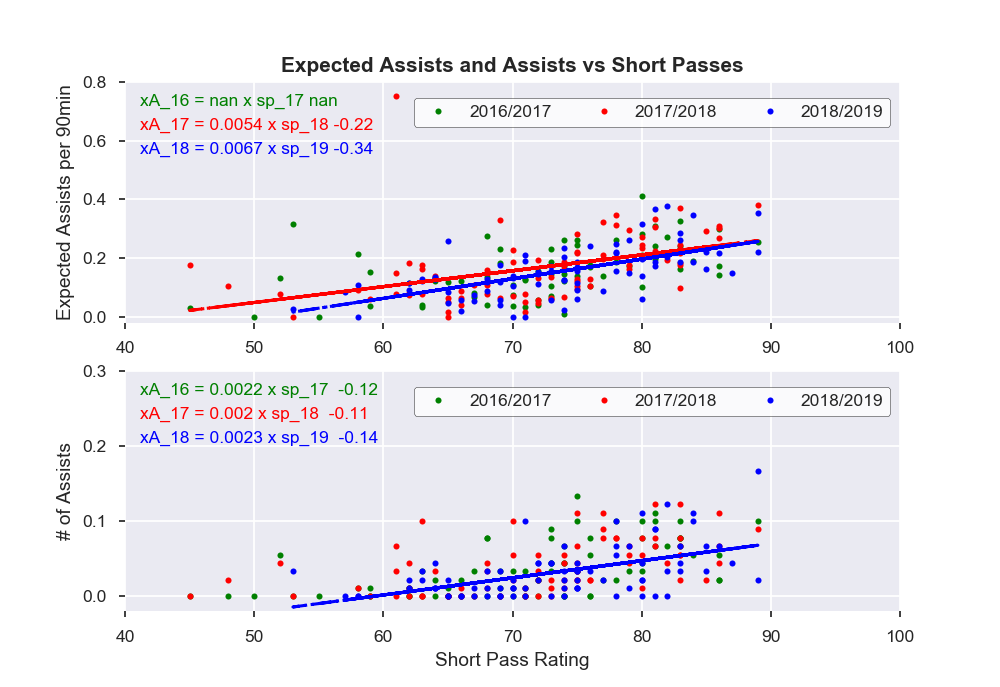

In [115]:
# xA and assists vs short pass

fig, ax = plt.subplots(2,1)

# ----------- Suplot 1

ax[0].plot(sp_17, xA_16, 'g.')
ax[0].plot(sp_18, xA_17, 'r.')
ax[0].plot(sp_19, xA_18, 'b.')

#Linear regression sp_17/xA_16
(m01_slope, m01_int, m01_r, m01_p, m01_std_err) = linregress(sp_17, xA_16)
m01_fit = (m01_slope * sp_17) + m01_int
ax[0].plot(sp_17, m01_fit,"g-.")


#Linear regression sp_18/xA_17
(m02_slope, m02_int, m02_r, m02_p, m02_std_err) = linregress(sp_18, xA_17)
m02_fit = (m02_slope * sp_18) + m02_int
ax[0].plot(sp_18, m02_fit,"r-.")


#Linear regression sp_19/xA_18
(m03_slope, m03_int, m03_r, m02_p, m03_std_err) = linregress(sp_19,xA_18)
m03_fit = (m03_slope * sp_19) + m03_int
ax[0].plot(sp_19, m03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(m01_slope,4)) + " x sp_17 " + str(round(m01_int,2))
eq_02 = "xA_17 = " + str(round(m02_slope,4)) + " x sp_18 " + str(round(m02_int,2))
eq_03 = "xA_18 = " + str(round(m03_slope,4)) + " x sp_19 " + str(round(m03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)


# ----------- Suplot 2 

ax[1].plot(sp_17, a_16, 'g.')
ax[1].plot(sp_18, a_17, 'r.')
ax[1].plot(sp_19, a_18, 'b.')


#Linear regression sp_17/a_16
(m11_slope, m11_int, m11_r, m11_p, m11_std_err) = linregress(sp_17, a_16)
m11_fit = (m11_slope * sp_17) + m11_int
#ax[1].plot(sp_17,m11_fit,"g-.")

#Linear regression sp_18/a_17
(m12_slope, m12_int, m12_r, m12_p, m12_std_err) = linregress(sp_18,a_17)
m12_fit = (m12_slope * sp_18) + m12_int
#ax[1].plot(sp_18, m12_fit,"r-.")

#Linear regression sp_19/a_18
(m13_slope, m13_int, m13_r, m13_p, m13_std_err) = linregress(sp_19,a_18)
m13_fit = (m13_slope * sp_19) + m13_int
ax[1].plot(sp_19, m13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(m11_slope,4)) + " x sp_17  " + str(round(m11_int,2))
eq_12 = "xA_17 = " + str(round(m12_slope,4)) + " x sp_18  " + str(round(m12_int,2))
eq_13 = "xA_18 = " + str(round(m13_slope,4)) + " x sp_19  " + str(round(m13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)



# ---------------------------
ax[0].set_ylabel('Expected Assists per 90min')

ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(40, 100)

ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)


ax[1].set_xlabel('Short Pass Rating')
ax[1].set_ylabel('# of Assists')

ax[1].set_ylim(-0.02, 0.3)
ax[1].set_xlim(40, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)

ax[0].set_title('Expected Assists and Assists vs Short Passes', fontweight ='bold')
plt.show()
plt.savefig('images/shortpass.png')


In [ ]:
(m01_slope, m11_int, m11_r, m11_p, m11_std_err)

<IPython.core.display.Javascript object>


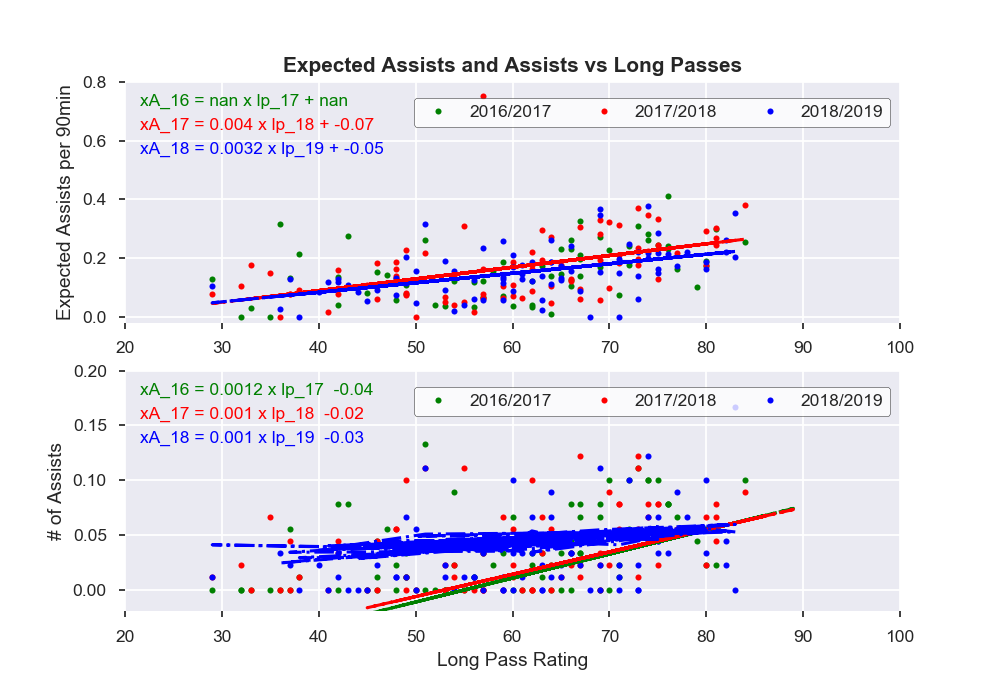

In [127]:
# xA and assists vs long pass

fig, ax = plt.subplots(2,1)

# ------------- Suplot 1

ax[0].plot(lp_17, xA_16, 'g.')
ax[0].plot(lp_18, xA_17, 'r.')
ax[0].plot(lp_19, xA_18, 'b.')


#Linear regression lp_17/xA_16
(n01_slope, n01_int, n01_r, n01_p, n01_std_err) = linregress(lp_17, xA_16)
n01_fit = (n01_slope * lp_17) + n01_int
ax[0].plot(lp_17, n01_fit,"g-.")


#Linear regression lp_18/xA_17
(n02_slope, n02_int, n02_r, n02_p, n02_std_err) = linregress(lp_18, xA_17)
n02_fit = (n02_slope * lp_18) + n02_int
ax[0].plot(lp_18, n02_fit,"r-.")


#Linear regression lp_19/xA_18
(n03_slope, n03_int, n03_r, n02_p, n03_std_err) = linregress(lp_19,xA_18)
n03_fit = (n03_slope * lp_19) + n03_int
ax[0].plot(lp_19, n03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(n01_slope,4)) + " x lp_17 + " + str(round(n01_int,2))
eq_02 = "xA_17 = " + str(round(n02_slope,4)) + " x lp_18 + " + str(round(n02_int,2))
eq_03 = "xA_18 = " + str(round(n03_slope,4)) + " x lp_19 + " + str(round(n03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)


#----------------- Subplot 2

ax[1].plot(lp_17, a_16, 'g.')
ax[1].plot(lp_18, a_17, 'r.')
ax[1].plot(lp_19, a_18, 'b.')

#Linear regression sp_17/a_16
(n11_slope, n11_int, n11_r, n11_p, n11_std_err) = linregress(lp_17, a_16)
n11_fit = (n11_slope * lp_17) + n11_int
ax[1].plot(sp_17,m11_fit,"g-.")

#Linear regression sp_18/a_17
(n12_slope, n12_int, n12_r, n12_p, n12_std_err) = linregress(lp_18,a_17)
n12_fit = (n12_slope * lp_18) + n12_int
ax[1].plot(sp_18, m12_fit,"r-.")

#Linear regression sp_19/a_18
(n13_slope, n13_int, n13_r, n13_p, n13_std_err) = linregress(lp_19,a_18)
n13_fit = (n13_slope * sp_19) + n13_int
ax[1].plot(lp_19, n13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(n11_slope,4)) + " x lp_17  " + str(round(n11_int,2))
eq_12 = "xA_17 = " + str(round(n12_slope,4)) + " x lp_18  " + str(round(n12_int,2))
eq_13 = "xA_18 = " + str(round(n13_slope,4)) + " x lp_19  " + str(round(n13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)


# -----------------------------

ax[0].set_ylabel('Expected Assists per 90min')
ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(20, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)


ax[1].set_xlabel('Long Pass Rating')
ax[1].set_ylabel('# of Assists')
ax[1].set_ylim(-0.02, 0.2)
ax[1].set_xlim(20, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)


ax[0].set_title('Expected Assists and Assists vs Long Passes', fontweight ='bold')
plt.show()
plt.savefig('images/longpass.png')



<IPython.core.display.Javascript object>


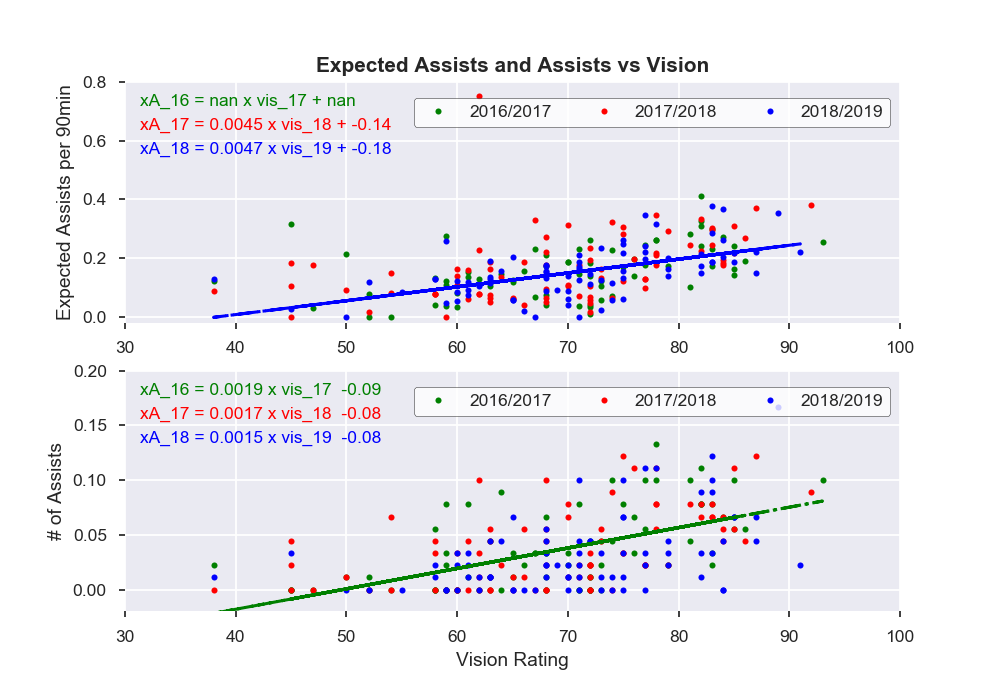

In [129]:
# xA and assists vs vision

fig, ax = plt.subplots(2,1)

# --- Suplot 1

ax[0].plot(vis_17, xA_16, 'g.')
ax[0].plot(vis_18, xA_17, 'r.')
ax[0].plot(vis_19, xA_18, 'b.')

#Linear regression lp_17/xA_16
(p01_slope, p01_int, p01_r, p01_p, p01_std_err) = linregress(vis_17, xA_16)
p01_fit = (p01_slope * vis_17) + p01_int
#ax[0].plot(vis_17, p01_fit,"g-.")


#Linear regression lp_18/xA_17
(p02_slope, p02_int, p02_r, p02_p, p02_std_err) = linregress(vis_18, xA_17)
p02_fit = (p02_slope * vis_18) + p02_int
#ax[0].plot(vis_18, p02_fit,"r-.")


#Linear regression lp_19/xA_18
(p03_slope, p03_int, p03_r, p02_p, p03_std_err) = linregress(vis_19,xA_18)
p03_fit = (p03_slope * vis_19) + p03_int
ax[0].plot(vis_19, p03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(p01_slope,4)) + " x vis_17 + " + str(round(p01_int,2))
eq_02 = "xA_17 = " + str(round(p02_slope,4)) + " x vis_18 + " + str(round(p02_int,2))
eq_03 = "xA_18 = " + str(round(p03_slope,4)) + " x vis_19 + " + str(round(p03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)




# ------- Subplot 2

ax[1].plot(vis_17, a_16, 'g.')
ax[1].plot(vis_18, a_17, 'r.')
ax[1].plot(vis_19, a_18, 'b.')


#Linear regression sp_17/a_16
(p11_slope, p11_int, p11_r, p11_p, p11_std_err) = linregress(vis_17, a_16)
p11_fit = (p11_slope * vis_17) + p11_int
ax[1].plot(vis_17,p11_fit,"g-.")

#Linear regression sp_18/a_17
(p12_slope, p12_int, p12_r, p12_p, p12_std_err) = linregress(vis_18,a_17)
p12_fit = (p12_slope * vis_18) + p12_int
#ax[1].plot(vis_18, p12_fit,"r-.")

#Linear regression sp_19/a_18
(p13_slope, p13_int, p13_r, p13_p, p13_std_err) = linregress(vis_19,a_18)
p13_fit = (p13_slope * vis_19) + p13_int
#ax[1].plot(vis_19, p13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(p11_slope,4)) + " x vis_17  " + str(round(p11_int,2))
eq_12 = "xA_17 = " + str(round(p12_slope,4)) + " x vis_18  " + str(round(p12_int,2))
eq_13 = "xA_18 = " + str(round(p13_slope,4)) + " x vis_19  " + str(round(p13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------

ax[0].set_ylabel('Expected Assists per 90min')
ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(30, 100)

ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)


ax[1].set_xlabel('Vision Rating')
ax[1].set_ylabel('# of Assists')
ax[1].set_ylim(-0.02, 0.2)
ax[1].set_xlim(30, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)


ax[0].set_title('Expected Assists and Assists vs Vision', fontweight ='bold')
plt.show()
plt.savefig('images/vision.png')



<IPython.core.display.Javascript object>


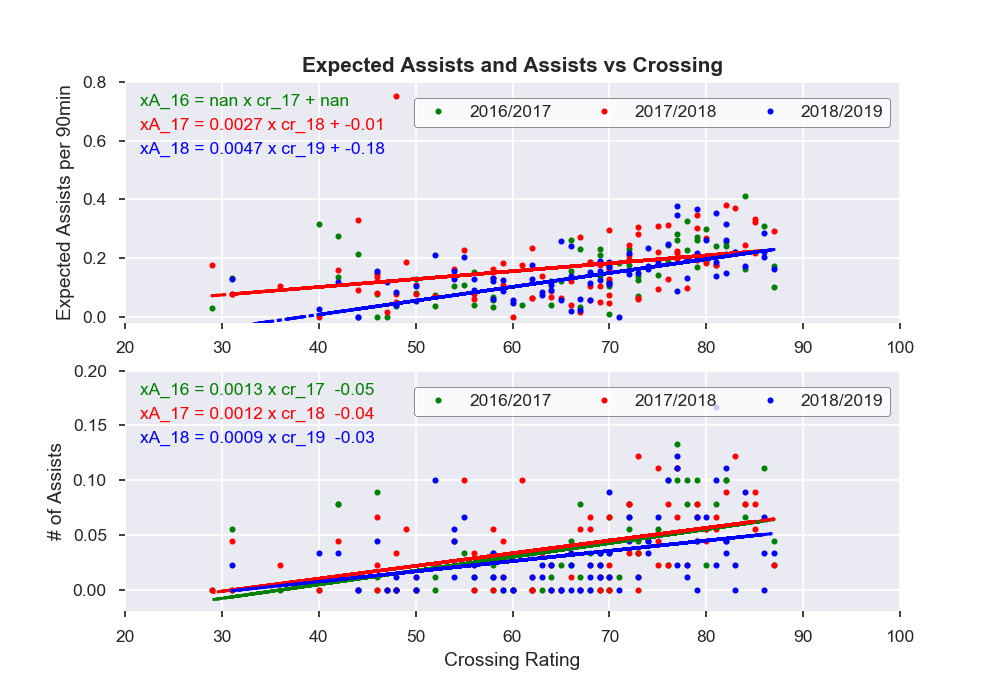

In [104]:
# xA and assists vs crossing

fig, ax = plt.subplots(2,1)

# --------- Subplot 1

ax[0].plot(cr_17, xA_16, 'g.')
ax[0].plot(cr_18, xA_17, 'r.')
ax[0].plot(cr_19, xA_18, 'b.')

#Linear regression lp_17/xA_16
(w01_slope, w01_int, w01_r, w01_p, w01_std_err) = linregress(cr_17, xA_16)
w01_fit = (w01_slope * cr_17) + w01_int
ax[0].plot(cr_17, w01_fit,"g-.")


#Linear regression lp_18/xA_17
(w02_slope, w02_int, w02_r, w02_p, w02_std_err) = linregress(cr_18, xA_17)
w02_fit = (w02_slope * cr_18) + w02_int
ax[0].plot(cr_18, w02_fit,"r-.")


#Linear regression lp_19/xA_18
(w03_slope, w03_int, w03_r, w02_p, w03_std_err) = linregress(vis_19,xA_18)
w03_fit = (w03_slope * cr_19) + w03_int
ax[0].plot(cr_19, w03_fit,"b-.")


eq_01 = "xA_16 = " + str(round(w01_slope,4)) + " x cr_17 + " + str(round(w01_int,2))
eq_02 = "xA_17 = " + str(round(w02_slope,4)) + " x cr_18 + " + str(round(w02_int,2))
eq_03 = "xA_18 = " + str(round(w03_slope,4)) + " x cr_19 + " + str(round(w03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)


# ------- Subplot 2

ax[1].plot(cr_17, a_16, 'g.')
ax[1].plot(cr_18, a_17, 'r.')
ax[1].plot(cr_19, a_18, 'b.')


#Linear regression cr_17/a_16
(w11_slope, w11_int, w11_r, w11_p, w11_std_err) = linregress(cr_17, a_16)
w11_fit = (w11_slope * cr_17) + w11_int
ax[1].plot(cr_17,w11_fit,"g-.")

#Linear regression sp_18/a_17
(w12_slope, w12_int, w12_r, w12_p, w12_std_err) = linregress(cr_18,a_17)
w12_fit = (w12_slope * cr_18) + w12_int
ax[1].plot(cr_18, w12_fit,"r-.")

#Linear regression sp_19/a_18
(w13_slope, w13_int, w13_r, w13_p, w13_std_err) = linregress(cr_19,a_18)
w13_fit = (w13_slope * cr_19) + w13_int
ax[1].plot(cr_19, w13_fit,"b-.")


eq_11 = "xA_16 = " + str(round(w11_slope,4)) + " x cr_17  " + str(round(w11_int,2))
eq_12 = "xA_17 = " + str(round(w12_slope,4)) + " x cr_18  " + str(round(w12_int,2))
eq_13 = "xA_18 = " + str(round(w13_slope,4)) + " x cr_19  " + str(round(w13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------------------------------------------------------------
ax[0].set_ylabel('Expected Assists per 90min')
ax[0].set_ylim(-0.02, 0.8)
ax[0].set_xlim(20, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)




ax[1].set_xlabel('Crossing Rating')
ax[1].set_ylabel('# of Assists')
ax[1].set_ylim(-0.02, 0.2)
ax[1].set_xlim(20, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)


ax[0].set_title('Expected Assists and Assists vs Crossing', fontweight ='bold')
plt.show()
plt.savefig('images/crossing.png')



In [130]:
#Comparison of xG data to shooting relevant stats
xG_16 = (data_nodup['xG_16'][0:100]/data_nodup['time_16'][0:100])*90
xG_17 = (data_nodup['xG_17'][0:100]/data_nodup['time_17'][0:100])*90
xG_18 = (data_nodup['xG_18'][0:100]/data_nodup['time_18'][0:100])*90


g_16 = data_nodup['goals_16'][0:100]/90
g_17 = data_nodup['goals_17'][0:100]/90
g_18 = data_nodup['goals_18'][0:100]/90


pos_17 = data_nodup['Positioning_2017'][0:100]
pos_18 = data_nodup['Positioning_2018'][0:100]
pos_19 = data_nodup['Positioning_2019'][0:100]


fin_17 = data_nodup['Finishing_2017'][0:100]
fin_18 = data_nodup['Finishing_2018'][0:100]
fin_19 = data_nodup['Finishing_2019'][0:100]


<IPython.core.display.Javascript object>


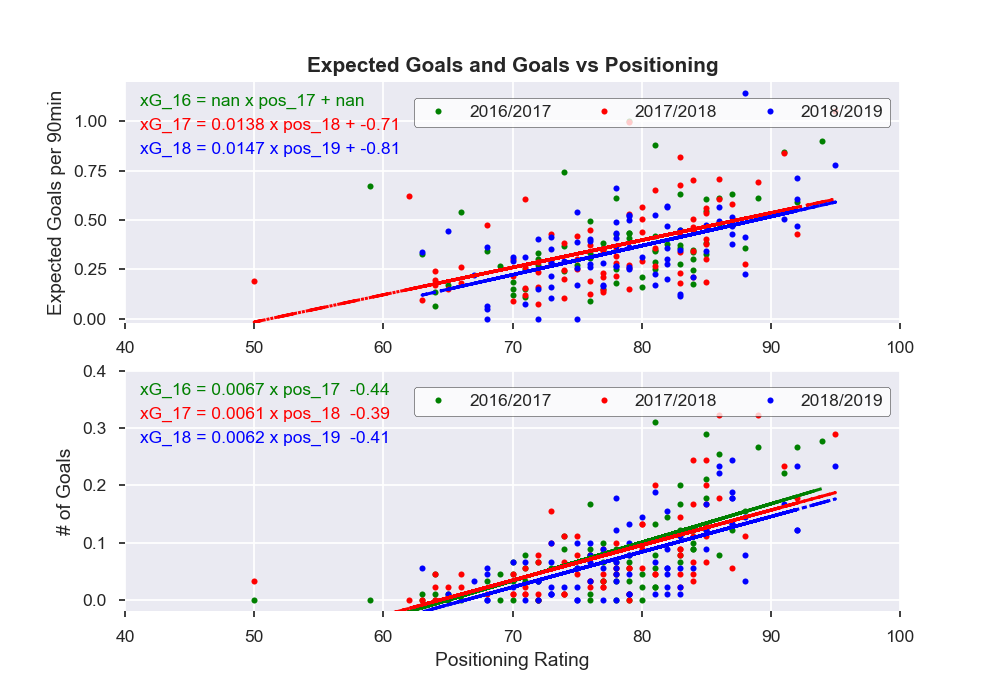

In [132]:
#finishing vs xG vs goals

fig, ax = plt.subplots(2,1)

# --------- Subplot 1

ax[0].plot(pos_17, xG_16, 'g.')
ax[0].plot(pos_18, xG_17, 'r.')
ax[0].plot(pos_19, xG_18, 'b.')


#Linear regression lp_17/xA_16
(q01_slope, q01_int, q01_r, q01_p, q01_std_err) = linregress(pos_17, xG_16)
q01_fit = (q01_slope * pos_17) + q01_int
ax[0].plot(pos_17, q01_fit,"g-.")


#Linear regression lp_18/xA_17
(q02_slope, q02_int, q02_r, q02_p, q02_std_err) = linregress(pos_18, xG_17)
q02_fit = (q02_slope * pos_18) + q02_int
ax[0].plot(pos_18, q02_fit,"r-.")


#Linear regression lp_19/xA_18
(q03_slope, q03_int, q03_r, q02_p, q03_std_err) = linregress(pos_19,xG_18)
q03_fit = (q03_slope * pos_19) + q03_int
ax[0].plot(pos_19, q03_fit,"b-.")


eq_01 = "xG_16 = " + str(round(q01_slope,4)) + " x pos_17 + " + str(round(q01_int,2))
eq_02 = "xG_17 = " + str(round(q02_slope,4)) + " x pos_18 + " + str(round(q02_int,2))
eq_03 = "xG_18 = " + str(round(q03_slope,4)) + " x pos_19 + " + str(round(q03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)

# ---------- Subplot 2

ax[1].plot(pos_17, g_16, 'g.')
ax[1].plot(pos_18, g_17, 'r.')
ax[1].plot(pos_19, g_18, 'b.')

#Linear regression cr_17/a_16
(q11_slope, q11_int, q11_r, q11_p, q11_std_err) = linregress(pos_17, g_16)
q11_fit = (q11_slope * pos_17) + q11_int
ax[1].plot(pos_17,q11_fit,"g-.")

#Linear regression sp_18/a_17
(q12_slope, q12_int, q12_r, q12_p, q12_std_err) = linregress(pos_18,g_17)
q12_fit = (q12_slope * pos_18) + q12_int
ax[1].plot(pos_18, q12_fit,"r-.")

#Linear regression sp_19/a_18
(q13_slope, q13_int, q13_r, q13_p, q13_std_err) = linregress(pos_19,g_18)
q13_fit = (q13_slope * pos_19) + q13_int
ax[1].plot(pos_19, q13_fit,"b-.")


eq_11 = "xG_16 = " + str(round(q11_slope,4)) + " x pos_17  " + str(round(q11_int,2))
eq_12 = "xG_17 = " + str(round(q12_slope,4)) + " x pos_18  " + str(round(q12_int,2))
eq_13 = "xG_18 = " + str(round(q13_slope,4)) + " x pos_19  " + str(round(q13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------



ax[0].set_ylabel('Expected Goals per 90min')
ax[0].set_ylim(-0.02, 1.2)
ax[0].set_xlim(40, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)



ax[1].set_xlabel('Positioning Rating')
ax[1].set_ylabel('# of Goals')

ax[1].set_ylim(-0.02, 0.4)
ax[1].set_xlim(40, 100)


ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)

ax[0].set_title('Expected Goals and Goals vs Positioning', fontweight ='bold')
plt.show()
plt.savefig('images/Positioning.png')



<IPython.core.display.Javascript object>


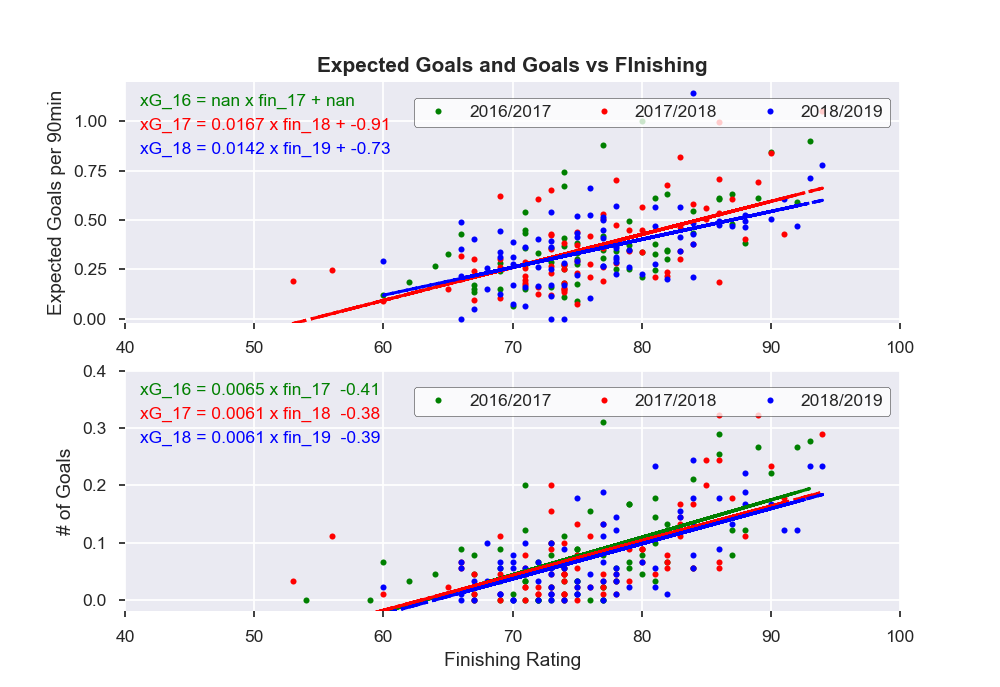

In [133]:
# Finishing vs xG vs goals

fig, ax = plt.subplots(2,1)

#-------------- Subplot 1
ax[0].plot(fin_17, xG_16, 'g.')
ax[0].plot(fin_18, xG_17, 'r.')
ax[0].plot(fin_19, xG_18, 'b.')


#Linear regression fin_17/xG_16
(r01_slope, r01_int, r01_r, r01_p, r01_std_err) = linregress(fin_17, xG_16)
r01_fit = (r01_slope * fin_17) + r01_int
ax[0].plot(fin_17, r01_fit,"g-.")


#Linear regression fin_18/xG_17
(r02_slope, r02_int, r02_r, r02_p, r02_std_err) = linregress(fin_18, xG_17)
r02_fit = (r02_slope * fin_18) + r02_int
ax[0].plot(fin_18, r02_fit,"r-.")


#Linear regression fin_19/xG_18
(r03_slope, r03_int, r03_r, r02_p, r03_std_err) = linregress(fin_19,xG_18)
r03_fit = (r03_slope * fin_19) + r03_int
ax[0].plot(fin_19, r03_fit,"b-.")


eq_01 = "xG_16 = " + str(round(r01_slope,4)) + " x fin_17 + " + str(round(r01_int,2))
eq_02 = "xG_17 = " + str(round(r02_slope,4)) + " x fin_18 + " + str(round(r02_int,2))
eq_03 = "xG_18 = " + str(round(r03_slope,4)) + " x fin_19 + " + str(round(r03_int,2))


ax[0].text(0.02, 0.9, eq_01, color = "green", fontsize  =10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.8, eq_02, color = "red", fontsize=10, transform=ax[0].transAxes)
ax[0].text(0.02, 0.7, eq_03, color = "blue", fontsize=10, transform=ax[0].transAxes)

# -----------Subplot 2

ax[1].plot(fin_17, g_16, 'g.')
ax[1].plot(fin_18, g_17, 'r.')
ax[1].plot(fin_19, g_18, 'b.')



#Linear regression fin_17/g_16
(r11_slope, r11_int, r11_r, r11_p, r11_std_err) = linregress(fin_17, g_16)
r11_fit = (r11_slope * fin_17) + r11_int
ax[1].plot(fin_17,r11_fit,"g-.")

#Linear regression fin_18/g_17
(r12_slope, r12_int, r12_r, r12_p, r12_std_err) = linregress(fin_18,g_17)
r12_fit = (r12_slope * fin_18) + r12_int
ax[1].plot(fin_18, r12_fit,"r-.")

#Linear regression fin_19/g_18
(r13_slope, r13_int, r13_r, r13_p, r13_std_err) = linregress(fin_19,g_18)
r13_fit = (r13_slope * fin_19) + r13_int
ax[1].plot(fin_19, r13_fit,"b-.")


eq_11 = "xG_16 = " + str(round(r11_slope,4)) + " x fin_17  " + str(round(r11_int,2))
eq_12 = "xG_17 = " + str(round(r12_slope,4)) + " x fin_18  " + str(round(r12_int,2))
eq_13 = "xG_18 = " + str(round(r13_slope,4)) + " x fin_19  " + str(round(r13_int,2))


ax[1].text(0.02, -0.3, eq_11, color = "green", fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.4, eq_12, color = "red",   fontsize=10, transform=ax[0].transAxes)
ax[1].text(0.02, -0.5, eq_13, color = "blue",  fontsize=10, transform=ax[0].transAxes)

# ------------------------------------------------------------



ax[0].set_ylabel('Expected Goals per 90min')
ax[0].set_ylim(-0.02, 1.2)
ax[0].set_xlim(40, 100)
ax[0].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)



ax[1].set_xlabel('Finishing Rating')
ax[1].set_ylabel('# of Goals')
ax[1].set_ylim(-0.02, 0.4)
ax[1].set_xlim(40, 100)

ax[1].legend(['2016/2017','2017/2018','2018/2019'], facecolor = 'w', edgecolor = 'k', 
             bbox_to_anchor=(0.68, 0.97), frameon = True, 
             loc='upper center',ncol=3)

ax[0].set_title('Expected Goals and Goals vs FInishing', fontweight ='bold')
plt.show()
plt.savefig('images/Finishing.png')






